Pre processing

In [59]:
import nbformat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Number of deleted rows: 23
There are 558808 rows and 16 columns in the dataset
            id  year    make                model         trim       body  \
0            0  2015     Kia              Sorento           LX        SUV   
1            1  2015     Kia              Sorento           LX        SUV   
2            2  2014     BMW             3 Series   328i SULEV      Sedan   
3            3  2015   Volvo                  S60           T5      Sedan   
4            4  2014     BMW  6 Series Gran Coupe         650i      Sedan   
...        ...   ...     ...                  ...          ...        ...   
558803  558803  2015     Kia                 K900       Luxury      Sedan   
558804  558804  2012     Ram                 2500  Power Wagon   Crew Cab   
558805  558805  2012     BMW                   X5    xDrive35d        SUV   
558806  558806  2015  Nissan               Altima        2.5 S      sedan   
558807  558807  2014    Ford                F-150          XLT  SuperCrew 

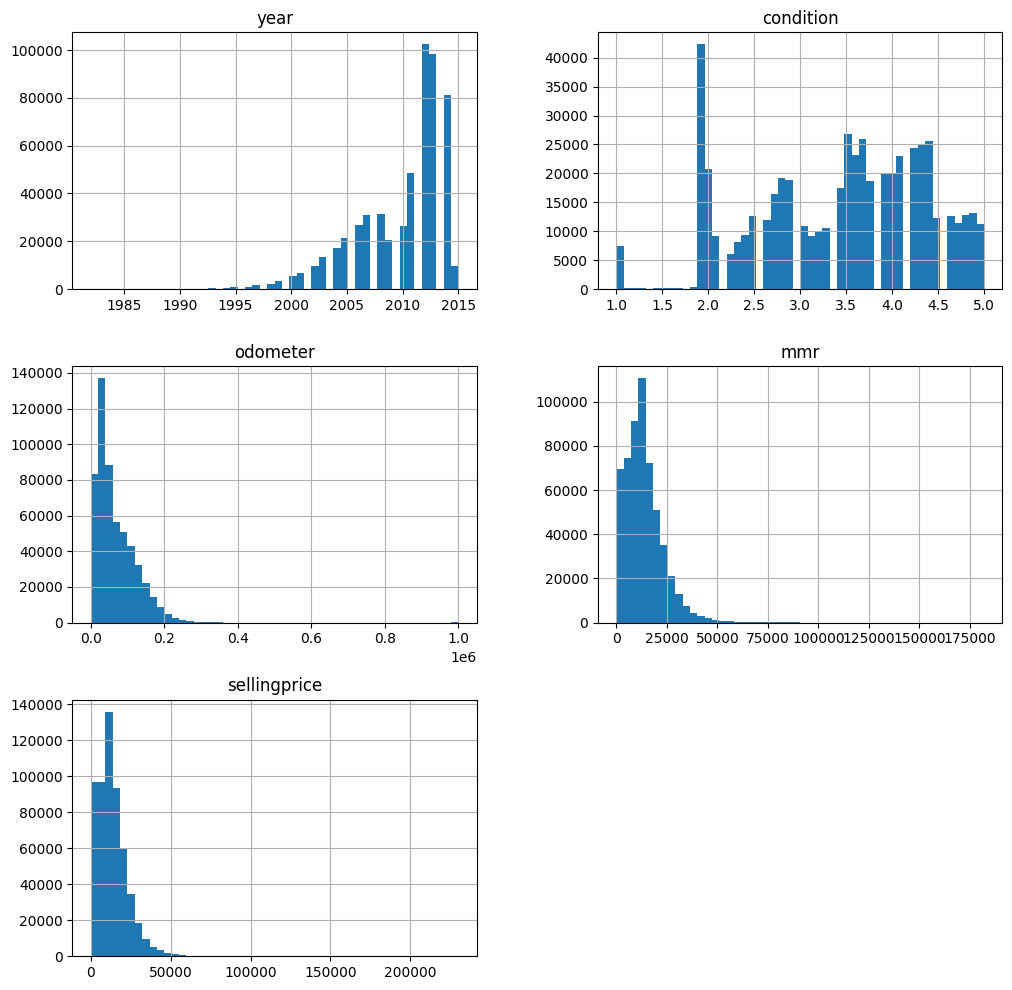

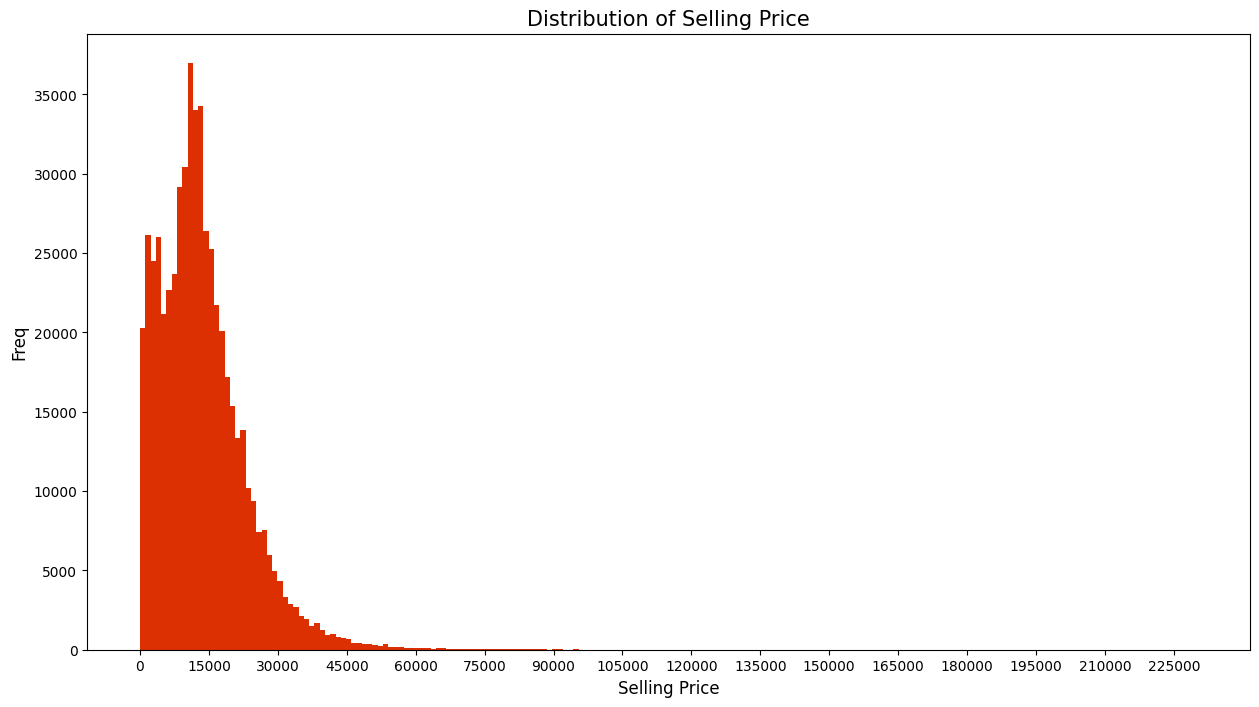

    year   make                model        trim   body transmission  \
id                                                                     
0   2015    Kia              Sorento          LX    SUV    automatic   
1   2015    Kia              Sorento          LX    SUV    automatic   
2   2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3   2015  Volvo                  S60          T5  Sedan    automatic   
4   2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                  vin state  condition  odometer  ... colors make_ordinal  \
id                                                ...                       
0   5xyktca69fg566472    ca        5.0   16639.0  ...    NaN            0   
1   5xyktca69fg561319    ca        5.0    9393.0  ...    NaN            0   
2   wba3c1c51ek116351    ca        4.5    1331.0  ...    NaN            1   
3   yv1612tb4f1310987    ca        4.1   14282.0  ...    NaN            2   
4   wba6b2c57ed129731    ca      

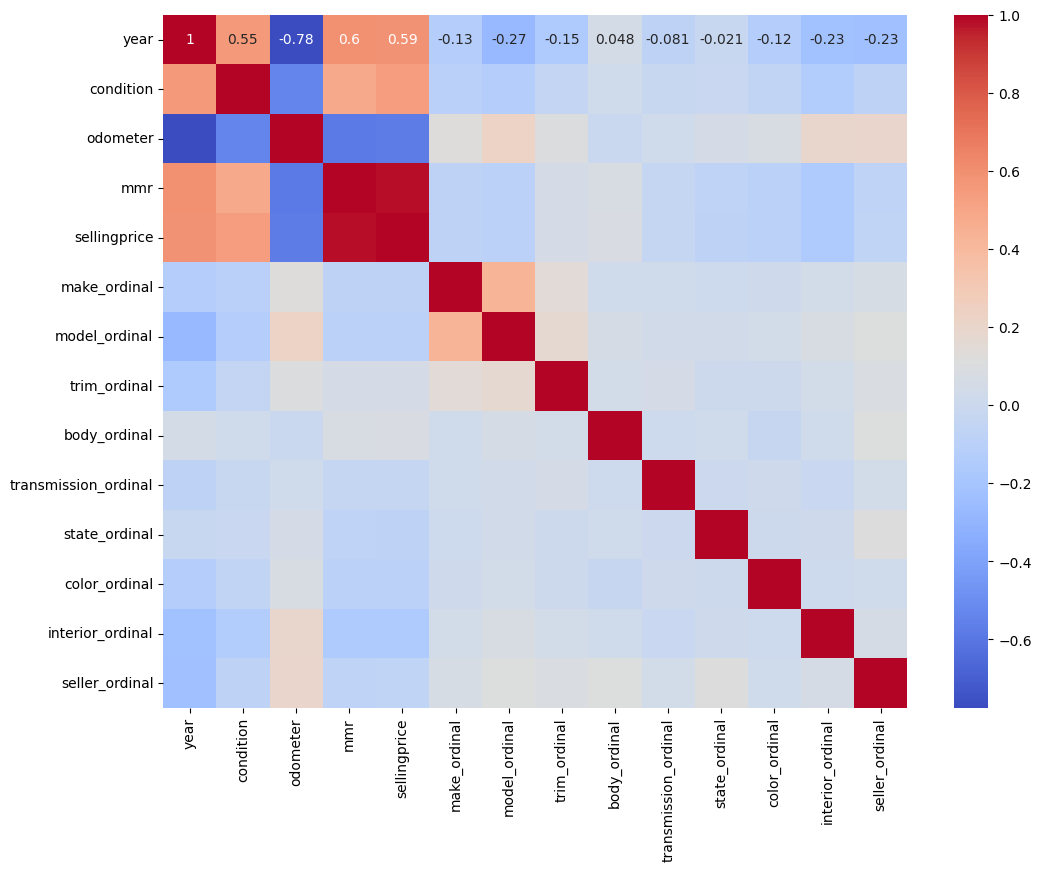

In [77]:
def read_notebook(path):
    with open(path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    return nb

def execute_notebook(notebook):
    namespace = {}
    for cell in notebook.cells:
        if cell.cell_type == 'code':
            code = cell.source
            try:
                exec(code, namespace)
            except Exception as e:
                print(f"Error executing the code: {code}")
                print(f"Error: {e}")
    return namespace

# Path to your 'EDA.ipynb' notebook
notebook_path = 'EDA.ipynb'

# Read the notebook
nb = read_notebook(notebook_path)

# Execute the notebook and capture the namespace
namespace = execute_notebook(nb)

# Access from the namespace
correlationmatrix = namespace.get('correlationmatrix', None)
prices_df = namespace.get('prices_df', None)
if prices_df is not None:
    print(prices_df.head())
else:
    print("prices_df is not defined in the notebook.")

In [63]:
# Feature Engineering
avg_price = round(prices_df.groupby(["make"])["sellingprice"].agg(["mean"]),2).T
avg_price

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Daewoo,...,oldsmobile,plymouth,pontiac,porsche,smart,subaru,suzuki,toyota,volkswagen,vw
mean,14017.27,54812.0,19915.43,21441.9,74367.67,10721.76,15221.16,11977.4,11167.42,400.0,...,671.25,703.57,3233.33,30934.21,6236.87,3710.42,4810.0,7339.11,6145.83,13672.92


In [78]:
prices_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,colors,make_ordinal,model_ordinal,trim_ordinal,body_ordinal,transmission_ordinal,state_ordinal,color_ordinal,interior_ordinal,seller_ordinal
id,,,,,,,,,,,,,,,,,,,,,
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,NaN,0,0,0,0,0,0,0,0,0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,NaN,0,0,0,0,0,0,0,1,0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,...,NaN,1,1,1,1,0,0,1,0,1
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,...,NaN,2,2,2,1,0,0,0,0,2
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,...,NaN,1,3,3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558803,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,4.5,18255.0,...,NaN,0,28,23,1,0,18,4,0,18
558804,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,NaN,36,221,1974,6,0,28,0,0,14263
558805,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,...,NaN,1,19,149,0,0,0,2,0,1


In [80]:
# Calculate the average selling price by 'make'
avg_price_by_make = prices_df.groupby('make')['sellingprice'].mean()

# If 'avg_sellingprice_by_make' already exists, rename or drop it
if 'avg_sellingprice_by_make' in prices_df.columns:
    prices_df.drop('avg_sellingprice_by_make', axis=1, inplace=True)

# Merge with custom suffixes (if needed)
prices_df = prices_df.merge(avg_price_by_make.rename('avg_sellingprice_by_make'), on='make', suffixes=('', '_avg'))

# Display the first few rows of the updated DataFrame
prices_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,make_ordinal,model_ordinal,trim_ordinal,body_ordinal,transmission_ordinal,state_ordinal,color_ordinal,interior_ordinal,seller_ordinal,avg_sellingprice_by_make
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,0,0,0,0,0,0,0,0,0,11807.880898
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,0,0,0,0,0,0,0,1,0,11807.880898
2,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,...,0,10,0,1,0,0,3,2,8,11807.880898
3,2015,Kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,ca,5.0,14634.0,...,0,0,0,0,0,0,4,0,0,11807.880898
4,2015,Kia,Sorento,LX,SUV,automatic,5xyktca60fg565226,ca,5.0,13757.0,...,0,0,0,0,0,0,3,0,0,11807.880898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548502,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t47la04447,fl,4.2,8824.0,...,94,931,1856,2,0,8,12,0,28,112625.000000
548503,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t47la04254,fl,4.2,19908.0,...,94,931,1856,2,0,8,12,0,10485,112625.000000
548504,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t97la05738,ca,4.7,18624.0,...,94,931,1856,2,0,0,4,0,219,112625.000000
548505,2008,Lamborghini,Gallardo,Spyder,convertible,automatic,zhwgu22t28la06389,pa,4.4,19682.0,...,94,931,1856,33,0,2,2,2,13823,112625.000000


In [81]:
# Categorize the odometer readings into ranges/bins
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 950000, 1000000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-550k', '550k-600k', '600k-650k', '650k-700k', '950k-1000k']
prices_df['odometer_range'] = pd.cut(prices_df['odometer'], bins=bins, labels=labels, right=False)

# Calculate the average selling price for each odometer range
avg_price_by_odometer = prices_df.groupby('odometer_range')['sellingprice'].mean().reset_index()

# Display the result
print(avg_price_by_odometer)

   odometer_range  sellingprice
0           0-50k  18962.793892
1        50k-100k  11814.609674
2       100k-150k   6009.524826
3       150k-200k   3514.173183
4       200k-250k   2603.787715
5       250k-300k   2376.348477
6       300k-350k   2503.076063
7       350k-400k   2303.991597
8       400k-450k   3892.307692
9       450k-500k   2171.428571
10      500k-550k   3900.000000
11      550k-600k   7000.000000
12      600k-650k   3100.000000
13      650k-700k    750.000000
14     950k-1000k   1735.915493


In [82]:
# Group by the 'condition' column and calculate the average selling price
avg_price_by_condition = prices_df.groupby('condition')['sellingprice'].mean().reset_index()

# Display the result
print(avg_price_by_condition)


    condition  sellingprice
0         1.0   4053.135429
1         1.1   4504.482759
2         1.2   3820.789474
3         1.3   3353.164557
4         1.4   3285.937500
5         1.5   4012.773723
6         1.6   4465.697674
7         1.7   4146.956522
8         1.8   4636.544586
9         1.9   5148.438303
10        2.0   5818.719764
11        2.1   7413.059557
12        2.2   7711.480606
13        2.3   8138.326925
14        2.4   8419.338949
15        2.5   8923.207774
16        2.6   9242.623088
17        2.7   9717.467069
18        2.8  10257.222459
19        2.9  10815.001350
20        3.0  12410.330105
21        3.1  11714.196065
22        3.2  11918.415608
23        3.3  12245.089015
24        3.4  12778.794300
25        3.5  13430.175157
26        3.6  14135.714818
27        3.7  14882.155701
28        3.8  15464.122889
29        3.9  16002.991026
30        4.0  17741.029742
31        4.1  17345.051873
32        4.2  17926.462033
33        4.3  18609.876960
34        4.4  19210

In [83]:
correlationmatrix["sellingprice"].sort_values(ascending=False)

sellingprice            1.000000
mmr                     0.983634
year                    0.586489
condition               0.538788
body_ordinal            0.080380
trim_ordinal            0.052333
transmission_ordinal   -0.038493
seller_ordinal         -0.065705
state_ordinal          -0.075748
make_ordinal           -0.076823
color_ordinal          -0.089943
model_ordinal          -0.091119
interior_ordinal       -0.155845
odometer               -0.580480
Name: sellingprice, dtype: float64

In [84]:
#Feature Engineering
avg_price = round(prices_df.groupby(["make"])["sellingprice"].agg(["mean"]),2).T
avg_price

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Daewoo,...,oldsmobile,plymouth,pontiac,porsche,smart,subaru,suzuki,toyota,volkswagen,vw
mean,14017.27,54812.0,19915.43,21441.9,74367.67,10721.76,15221.16,11977.4,11167.42,400.0,...,671.25,703.57,3233.33,30934.21,6236.87,3710.42,4810.0,7339.11,6145.83,13672.92


In [85]:
prices_df['range_ordinal'] = pd.factorize(prices_df['odometer_range'])[0]
prices_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,trim_ordinal,body_ordinal,transmission_ordinal,state_ordinal,color_ordinal,interior_ordinal,seller_ordinal,avg_sellingprice_by_make,odometer_range,range_ordinal
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,0,0,0,0,0,0,0,11807.880898,0-50k,0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,0,0,0,0,0,1,0,11807.880898,0-50k,0
2,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,...,0,1,0,0,3,2,8,11807.880898,0-50k,0
3,2015,Kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,ca,5.0,14634.0,...,0,0,0,0,4,0,0,11807.880898,0-50k,0
4,2015,Kia,Sorento,LX,SUV,automatic,5xyktca60fg565226,ca,5.0,13757.0,...,0,0,0,0,3,0,0,11807.880898,0-50k,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548502,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t47la04447,fl,4.2,8824.0,...,1856,2,0,8,12,0,28,112625.000000,0-50k,0
548503,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t47la04254,fl,4.2,19908.0,...,1856,2,0,8,12,0,10485,112625.000000,0-50k,0
548504,2007,Lamborghini,Gallardo,Spyder,Convertible,automatic,zhwgu22t97la05738,ca,4.7,18624.0,...,1856,2,0,0,4,0,219,112625.000000,0-50k,0
548505,2008,Lamborghini,Gallardo,Spyder,convertible,automatic,zhwgu22t28la06389,pa,4.4,19682.0,...,1856,33,0,2,2,2,13823,112625.000000,0-50k,0


In [86]:
#Feature Scaling
numerical_columns = ['sellingprice', 'year', 'condition', 'odometer', 'model_ordinal', 'trim_ordinal', 'body_ordinal', 'transmission_ordinal', 'state_ordinal', 'color_ordinal', 'interior_ordinal', 'seller_ordinal', 'range_ordinal']
scaler=StandardScaler()
prices_df[numerical_columns] = scaler.fit_transform(prices_df[numerical_columns])

In [88]:
#importance Feature
model_df = prices_df[['sellingprice', 'year', 'condition', 'odometer', 'model_ordinal', 'trim_ordinal', 'body_ordinal', 'transmission_ordinal', 'state_ordinal', 'color_ordinal', 'interior_ordinal', 'seller_ordinal', 'range_ordinal']]
model_df.head()

,sellingprice,year,condition,odometer,model_ordinal,trim_ordinal,body_ordinal,transmission_ordinal,state_ordinal,color_ordinal,interior_ordinal,seller_ordinal,range_ordinal
0,0.801926,1.249701,1.654571,-0.961924,-1.150447,-0.634304,-0.606458,-0.190575,-1.182195,-0.990517,-0.900008,-0.641948,-0.803839
1,0.801926,1.249701,1.654571,-1.098866,-1.150447,-0.634304,-0.606458,-0.190575,-1.182195,-0.990517,-0.401701,-0.641948,-0.803839
2,0.411319,1.249701,1.443269,-1.237942,-1.075404,-0.634304,-0.541695,-0.190575,-1.182195,-0.078349,0.096607,-0.639029,-0.803839
3,0.801926,1.249701,1.654571,-0.999817,-1.150447,-0.634304,-0.606458,-0.190575,-1.182195,0.225707,-0.900008,-0.641948,-0.803839
4,0.724833,1.249701,1.654571,-1.016391,-1.150447,-0.634304,-0.606458,-0.190575,-1.182195,-0.078349,-0.900008,-0.641948,-0.803839


In [89]:
model_df.describe()

,sellingprice,year,condition,odometer,model_ordinal,trim_ordinal,body_ordinal,transmission_ordinal,state_ordinal,color_ordinal,interior_ordinal,seller_ordinal,range_ordinal
count,5.485070e+05,5.485070e+05,5.368000e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05,5.485070e+05
mean,9.285516e-17,-7.388617e-15,-1.064014e-15,-2.487192e-17,9.285516e-17,1.823941e-17,9.451328e-17,4.746391e-17,-9.119703e-18,3.274802e-17,5.554728e-17,1.823941e-17,-8.290639e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.407984e+00,-6.680559e+00,-2.571469e+00,-1.276364e+00,-1.157951e+00,-6.385163e-01,-6.712213e-01,-1.905751e-01,-1.182195e+00,-1.294573e+00,-1.398315e+00,-6.419478e-01,-8.038393e-01
25%,-6.885480e-01,-5.410030e-01,-7.754023e-01,-7.446443e-01,-7.302096e-01,-5.921825e-01,-5.416947e-01,-1.905751e-01,-9.257519e-01,-6.864609e-01,-9.000078e-01,-6.251640e-01,-8.038393e-01
50%,-1.540331e-01,4.822563e-01,1.754566e-01,-3.048490e-01,-6.983719e-02,-3.520892e-01,-5.416947e-01,-1.905751e-01,-1.564225e-01,-3.824049e-01,-4.017005e-01,-4.409074e-01,1.270293e-01
75%,4.729939e-01,7.380712e-01,8.093626e-01,5.744487e-01,2.978701e-01,1.028246e-01,1.059383e-01,-1.905751e-01,6.129069e-01,2.257070e-01,1.093221e+00,8.705182e-02,1.270293e-01
max,2.223391e+01,1.249701e+00,1.654571e+00,1.762246e+01,6.143666e+00,7.680508e+00,4.898423e+00,5.247275e+00,3.562003e+00,4.786546e+00,7.072909e+00,4.562117e+00,1.222832e+01


Random forest model

In [90]:
# Train ,test 
x = model_df.drop(columns=["sellingprice"])
y = model_df["sellingprice"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
training_score = []
testing_score = []

In [91]:
# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Lists to store scores for visualization or further analysis
training_score = []
testing_score = []

# Define the model_prediction function if not already defined
def model_prediction(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    r2train = r2_score(y_train, x_train_pred) * 100
    r2test = r2_score(y_test, x_test_pred) * 100
    msetrain = mean_squared_error(y_train, x_train_pred)
    rmstrain = np.sqrt(msetrain)
    msetest = mean_squared_error(y_test, x_test_pred)
    rmstest = np.sqrt(msetest)
    training_score.append(r2train)
    testing_score.append(r2test)
    print(f"r2_Score of {type(model).__name__} model on training Data is:", r2train)
    print(f"r2_Score of {type(model).__name__} model on testing Data is:", r2test)
    print(f"RMSE of {type(model).__name__} model on training Data is:", rmstrain)
    print(f"RMSE of {type(model).__name__} model on testing Data is:", rmstest)

# Call the function with the Random Forest model
model_prediction(rf_model)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values